### 1. [What are the most popular coding language over time?](#language)
### 2. [What are the job satisfication observe over time?](#jobsatisfy)
### 3. [What are the top 10 factors that affect salary over time?](#10factors)

In [1]:
#load python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import re
%matplotlib inline

In [2]:
#load dataset for analysis
#df_2011 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2011/2011 Stack Overflow Survey Results.csv')
#df_2012 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2012/2012 Stack Overflow Survey Results.csv')
#df_2013 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2013/2013 Stack Overflow Survey Responses.csv')
#df_2014 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2014/2014 Stack Overflow Survey Responses.csv')
#df_2015 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2015/2015 Stack Overflow Developer Survey Responses.csv')
#df_2016 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2016/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')
df_2017 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2017/survey_results_public.csv',low_memory=False)
df_2018 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2018/survey_results_public.csv',low_memory=False)
df_2019 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2019/survey_results_public.csv',low_memory=False)
df_2020 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2020/survey_results_public.csv',low_memory=False)
df_2021 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2021/survey_results_public.csv',low_memory=False)
schema_2017 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2017/survey_results_schema.csv',low_memory=False)
schema_2018 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2018/survey_results_schema.csv',low_memory=False)
schema_2019 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2019/survey_results_schema.csv',low_memory=False)
schema_2020 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2020/survey_results_schema.csv',low_memory=False)
schema_2021 = pd.read_csv('C:/Users/yuqiu/Downloads/stack-overflow-developer-survey-2021/survey_results_schema.csv',low_memory=False)

<a id="language"></a>
# What are the most popular coding language over time?

In [5]:
def item_frequency(col):
    frequency = {}
    for item in col.dropna():
        for element in re.split(';\s|;', item):
            if element in frequency:
                frequency[element] += 1
            else:
                frequency[element] = 1
    df_frequency = pd.DataFrame.from_dict(frequency, orient='index', columns=['frequency'])/col.shape[0]
    return df_frequency

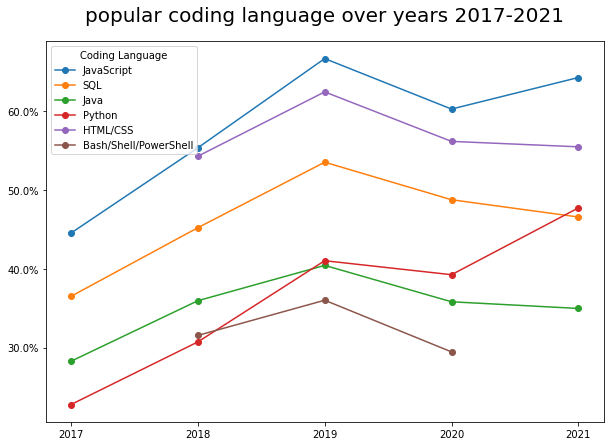

In [6]:
language_df1 = item_frequency(df_2017['HaveWorkedLanguage']).nlargest(6, 'frequency')
language_df2 = item_frequency(df_2018['LanguageWorkedWith']).drop(['CSS'], axis=0).rename(index={'HTML': 'HTML/CSS','Bash/Shell':'Bash/Shell/PowerShell'}).nlargest(6, 'frequency')
language_df3 = item_frequency(df_2019['LanguageWorkedWith']).nlargest(6, 'frequency')
language_df4 = item_frequency(df_2020['LanguageWorkedWith']).nlargest(6, 'frequency')
language_df5 = item_frequency(df_2021['LanguageHaveWorkedWith']).rename(index={'Bash/Shell':'Bash/Shell/PowerShell'}).nlargest(6, 'frequency')
language_df_new = pd.concat([language_df1, language_df2, language_df3, language_df4, language_df5], axis=1)
language_df_new.columns = ['2017','2018','2019','2020', '2021']
#print(df_new)

language_df_transposed = language_df_new.T.dropna(axis=1, thresh=2)
import matplotlib.ticker as mtick
ax1 = language_df_transposed.plot(figsize=(10,7), marker='o')
x = list(range(0,len(language_df_transposed.index)))
ax1.set_xticks(x)
#ax1.set_xticklabels(df_transposed.index)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title('popular coding language over years 2017-2021',fontsize=20,pad=20)
plt.legend(fontsize=10, loc ="upper left", title = 'Coding Language')
plt.show()

As we can see that JavaScript is the most popular coding language since 2017.

saff

<a id="jobsatisfy"></a>
# What are the job satisfaction observe over time?

In [7]:
Job_satisfaction = df_2017['JobSatisfaction'].dropna().to_frame()
Job_satisfaction['year'] = 2017
Job_satisfaction = Job_satisfaction.rename(columns={"JobSatisfaction": "rate"})
Job_satisfaction_total = Job_satisfaction[['rate','year']]

In [8]:
Job_satisfaction = df_2018['JobSatisfaction'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSatisfaction'] == 'Extremely satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Moderately satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Moderately dissatisfied'),
    (Job_satisfaction['JobSatisfaction'] == 'Extremely dissatisfied'),
    ]

values = [10, 8.33, 6.67, 5, 3.33, 1.67, 0]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2018

In [9]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

In [10]:
Job_satisfaction = df_2019['JobSat'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSat'] == 'Very satisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSat'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Very dissatisfied'),
    ]

values = [10,10-2.5,10-2.5*2,10-2.5*3,10-2.5*4]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2019

In [11]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

In [12]:
Job_satisfaction = df_2020['JobSat'].dropna().to_frame()

conditions = [
    (Job_satisfaction['JobSat'] == 'Very satisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly satisfied'),
    (Job_satisfaction['JobSat'] == 'Neither satisfied nor dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Slightly dissatisfied'),
    (Job_satisfaction['JobSat'] == 'Very dissatisfied'),
    ]

values = [10,10-2.5,10-2.5*2,10-2.5*3,10-2.5*4]

Job_satisfaction['rate'] = np.select(conditions, values)
Job_satisfaction['year'] = 2020

In [13]:
Job_satisfaction_total = pd.concat([Job_satisfaction_total, Job_satisfaction[['rate','year']]], ignore_index=True, sort=False)

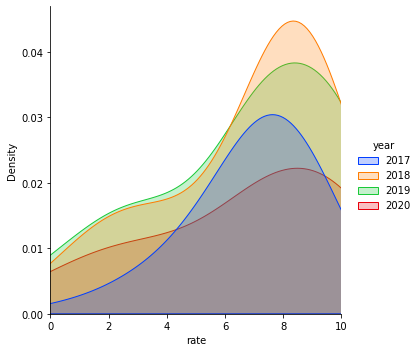

In [14]:
sns.displot(Job_satisfaction_total, x='rate', hue='year',kind='kde', fill=True, bw_adjust=5,
            color=['red','green','yellow','blue'], palette=sns.color_palette('bright')[:4]);
plt.xlim(0,10);

<a id="10factors"></a>
# What are the top 10 factors that affect salary over time?

In [36]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1, errors='ignore')
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).columns
    for var in cat_vars:
        # for each cat drop original column add dummy var
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1, errors='ignore')
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for var in num_vars:
        df[var].fillna((df[var].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).columns
    for var in cat_vars:
        # for each cat drop original column add dummy var
        df2 = df[[var]].str.split("; ").explode().reset_index()
        df2 = df2.pivot(index="index", columns=var, values=var)
        df = pd.concat([df.drop(var, axis=1), df2], axis=1)
    
    X = df
    return X, y

In [301]:
df=df_2018
df = df.dropna(subset=['Salary'], axis=0)
y = df['Salary']
df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1, errors='ignore')
cat_vars = df.select_dtypes(include=['object']).columns

In [302]:
df.head(2)

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
1,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
4,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [298]:
var='FormalEducation'

In [299]:
df2 = df[var].str.split(";").explode().reset_index()

KeyError: 'FormalEducation'

In [ ]:
df2

In [ ]:
df2 = df2.pivot(index="index", columns=var, values=var)

In [ ]:
df2

In [ ]:
df = pd.concat([df.drop(var, axis=1), df2], axis=1)

In [ ]:
df

In [296]:
for var in cat_vars:
    df2 = df[var].str.split("; ").explode().reset_index()
    df2 = df2.pivot(index="index", columns=var, values=var)
    df = pd.concat([df.drop(var, axis=1), df2], axis=1)

MemoryError: Unable to allocate 2.43 GiB for an array with shape (6436, 50578) and data type object

In [ ]:
df = pd.DataFrame({"Value": ["1", "1,3", "4,6,8", "1,3", "2,7,9"]})
value = df["Value"].str.split(",").explode().reset_index()
output = value.pivot(index="index", columns="Value", values="Value")

In [278]:
df = df_2017[['HaveWorkedLanguage']]

In [279]:
df

,HaveWorkedLanguage
0,Swift
1,JavaScript; Python; Ruby; SQL
2,Java; PHP; Python
3,Matlab; Python; R; SQL
4,NaN
...,...
51387,C#; JavaScript; Python; SQL; VB.NET; VBA
51388,Java; SQL
51389,NaN
51390,JavaScript; PHP; Swift


In [280]:
value = df["HaveWorkedLanguage"].str.split("; ").explode().reset_index()

In [281]:
value

,index,HaveWorkedLanguage
0,0,Swift
1,1,JavaScript
2,1,Python
3,1,Ruby
4,1,SQL
...,...,...
153426,51391,JavaScript
153427,51391,PHP
153428,51391,Python
153429,51391,Ruby


In [282]:
output = value.pivot(index="index", columns="HaveWorkedLanguage", values="HaveWorkedLanguage")

In [283]:
output

HaveWorkedLanguage,NaN,Assembly,C,C#,C++,Clojure,CoffeeScript,Common Lisp,Dart,Elixir,...,Ruby,Rust,SQL,Scala,Smalltalk,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Swift,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ruby,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,VB.NET,VBA,NaN
51388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#Use the function to create X and y
X, y = clean_data(df_2017)

In [231]:
df = df_2017
df.head(3).T

,0,1,2
Respondent,1,2,3
Professional,Student,Student,Professional developer
ProgramHobby,"Yes, both","Yes, both","Yes, both"
Country,United States,United Kingdom,United Kingdom
University,No,"Yes, full-time",No
EmploymentStatus,"Not employed, and not looking for work",Employed part-time,Employed full-time
FormalEducation,Secondary school,Some college/university study without earning ...,Bachelor's degree
MajorUndergrad,NaN,Computer science or software engineering,Computer science or software engineering
HomeRemote,NaN,"More than half, but not all, the time","Less than half the time, but at least one day ..."
CompanySize,NaN,20 to 99 employees,"10,000 or more employees"


In [ ]:
df

In [ ]:
df = df_2017
df = df.dropna(subset=['Salary'], axis=0)
df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1, errors='ignore')
cat_vars = df.select_dtypes(include=['object']).columns
for var in cat_vars:
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
df

In [219]:
df = df_2017['HaveWorkedLanguage']

In [220]:
HaveWorkedLanguage = df.str.split("; ").explode().reset_index()
df = HaveWorkedLanguage.pivot(index="index", columns="HaveWorkedLanguage", values="HaveWorkedLanguage")
df

HaveWorkedLanguage,NaN,Assembly,C,C#,C++,Clojure,CoffeeScript,Common Lisp,Dart,Elixir,...,Ruby,Rust,SQL,Scala,Smalltalk,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Swift,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ruby,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,VB.NET,VBA,NaN
51388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
df = df.dropna(axis=1,how='all')
df

HaveWorkedLanguage,Assembly,C,C#,C++,Clojure,CoffeeScript,Common Lisp,Dart,Elixir,Erlang,...,Ruby,Rust,SQL,Scala,Smalltalk,Swift,TypeScript,VB.NET,VBA,Visual Basic 6
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Swift,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ruby,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,VB.NET,VBA,NaN
51388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
cat_vars = df.select_dtypes(include=['object']).columns
for var in cat_vars:
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
df

""
index
0
1
2
3
4
...
51387
51388
51389


In [215]:
df

,NaN,Assembly,C,C#,C++,Clojure,CoffeeScript,Common Lisp,Dart,Elixir,...,R,Ruby,Rust,SQL,Scala,Smalltalk,Swift,TypeScript,VB.NET,VBA
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Swift,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Ruby,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,VB.NET,VBA
51388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN
51389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
df = pd.DataFrame({"Value": ["1", "1,3", "4,6,8", "1,3", "2,7,9"]})
value = df["Value"].str.split(",").explode().reset_index()
output = value.pivot(index="index", columns="Value", values="Value")

In [239]:
output

Value,1,2,3,4,6,7,8,9
index,,,,,,,,
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,3,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,4,6,NaN,8,NaN
3,1,NaN,3,NaN,NaN,NaN,NaN,NaN
4,NaN,2,NaN,NaN,NaN,7,NaN,9


In [165]:
df = 

,Value
0,1
1,"1,3"
2,"4,6,8"
3,"1,3"
4,"2,7,9"


In [166]:
df["Value"].str.split(",").explode().reset_index()

,index,Value
0,0,1
1,1,1
2,1,3
3,2,4
4,2,6
5,2,8
6,3,1
7,3,3
8,4,2
9,4,7


In [33]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.ylim([0, 1])
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    #lm_model = LinearRegression()
    lm_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

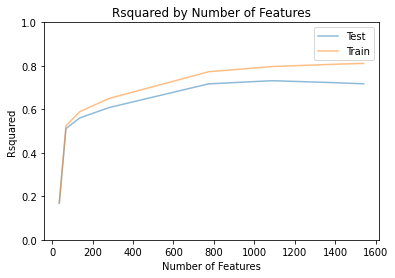

In [34]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [37]:
#Use the function to create X and y
X, y = clean_data(df_2018)

In [38]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

ValueError: could not convert string to float: '4000,00'